# INTERFEROMETRO FABRIS-PERROT

In [161]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
import scipy.stats as sc
import seaborn as sns

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val
from interpolazione import probability_under_norm

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'fabriperot.csv'
fr = pd.read_csv(FILE)

### FIGURA DI INTERFERENZA

In [162]:
#emettitore (cm)	ricevitore (cm)	DX (cm)	SX (cm)	V (Volt)	sigmaV	SXmax (cm)	Vmax  (Volt)	sigmaVmax

d = np.array(fr['DX (cm)'][0] - fr['SX (cm)']) * 0.01

V = fr['V (Volt)']
sigmaV = fr['sigmaV']

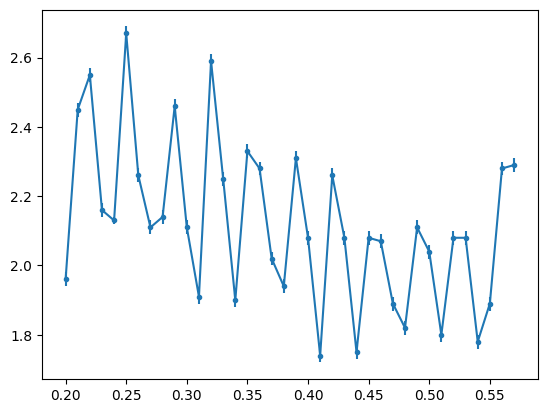

In [163]:
plt.errorbar(d, V, yerr=sigmaV, xerr=0.001, fmt='.-')
plt.show()

## FREQUENZE DI INTERFERENZA

punti di massimo:

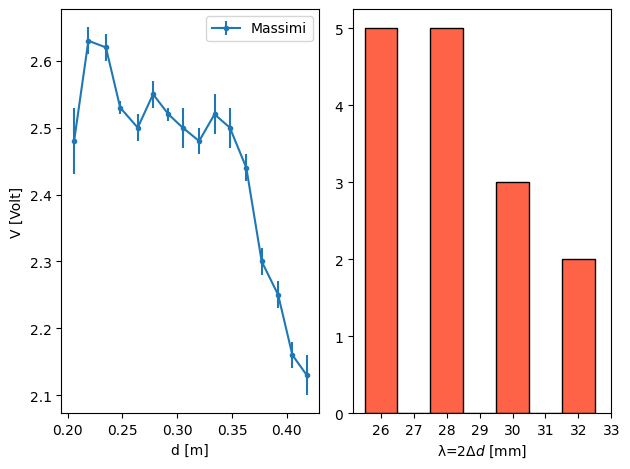

In [165]:
Vmax = np.array(fr['Vmax  (Volt)'])[0:17]
sigmaVmax = np.array(fr['sigmaVmax'])[0:17]
dmax = np.array(fr['DX (cm)'][0] - fr['SXmax (cm)'][0:17]) * 0.01

Δd = dmax[1:-1] - dmax[0:-2]
sigmaΔd = 0.001 * np.sqrt(2)

λfp = Δd*2
deltaλfp = sigmaΔd * 2
# print(np.round(λfp*1000).astype(np.int32))

import matplotlib.pyplot as plt

# Plot errorbar on the left
plt.subplot(1, 2, 1)
plt.errorbar(dmax, Vmax, yerr=sigmaVmax, xerr=0.001, fmt='.-', label='Massimi')
plt.xlabel('d [m]')
plt.ylabel('V [Volt]')
plt.legend()

# Plot histogram on the right
plt.subplot(1, 2, 2)
plt.hist(np.round(λfp*1000).astype(np.int32),bins=np.arange(26,34),edgecolor='black',color='tomato')
plt.xticks(np.arange(26,34)+0.5, ['26','27','28','29','30','31','32','33'])
plt.xlabel('λ=$2\\Delta d$ [mm]')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Calcolo $\lambda$

In [ ]:
λfpm, sigmaλfpm = np.mean(λfp), np.std(λfp)

FILE = dir_path + '/output.csv'
fr = pd.read_csv(FILE)

λ = np.float64(fr['λ'])
sigmaλ = np.float64(fr['σλ'])

print('λ fabris perot: ',final_val(λfpm,sigmaλfpm,3,-2,'m'))
print('λ precedente: ',final_val(λ,sigmaλ,3,-2,'m'))

avgλ = np.average([λ,λfpm],weights=1/np.array([sigmaλ,sigmaλfpm])**2)
print('λmedia: ',f'{np.round(avgλ*100,3)}e-2 m')


λ fabris perot:  (2.827 ± 0.205)e-2 m
λ precedente:  (2.819 ± 0.104)e-2 m
λmedia:  2.82e-2 m


confronto valori di $\lambda$:

In [ ]:
t = np.abs(λfpm - λ)/np.sqrt(sigmaλfpm**2 + sigmaλ **2)

print('t: ', np.round(t,2))

pval = probability_under_norm(0,1,t)
print('pvalue: ', np.round((1-pval)*100,1),'%')

t:  0.03
pvalue:  97.6 %


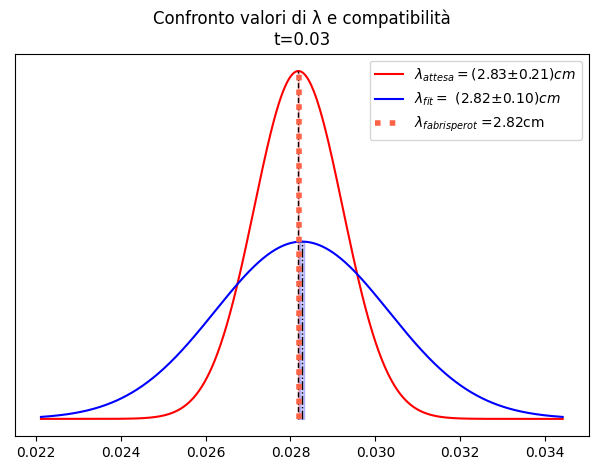

In [ ]:
m,M = np.min([λ-3*sigmaλ,λfpm-3*sigmaλfpm]),np.max([λ+3*sigmaλ,λfpm+3*sigmaλfpm])
x = np.linspace(m,M,1000)

# λ fabris perot:  (2.827 ± 0.205)e-2 m
# λ precedente:  (2.819 ± 0.104)e-2 m
# λmedia:  2.82e-2 m

λfp = '$(2.83 ± 0.21)cm$' 
λampezzadistanza = '$(2.82 ± 0.10)cm$' 
λmedia = '2.82cm'

n1 = sc.norm.pdf(x,loc=λ,scale=sigmaλ)
plt.plot(x,n1, color='red', label='$λ_{attesa} =$' + λfp)
t = np.abs(λ - avgλ) / sigmaλ
plt.fill_between(x= x,y1= n1,where= (λ- t*sigmaλ < x)&(x < λ + t*sigmaλ),color= "red",alpha= 0.2)
plt.vlines(x=λ,ymin=0,ymax=max(n1),linewidths=1.0,label="", color='black',linestyle="--")

n2 = sc.norm.pdf(x,loc=λfpm,scale=sigmaλfpm)
plt.plot(x,n2, color='blue', label='$λ_{fit} =$ '+ λampezzadistanza)
t = np.abs(λfpm - avgλ) / sigmaλfpm
plt.fill_between(x= x,y1= n2,where= (λfpm- t*sigmaλfpm < x)&(x < λfpm + t*sigmaλfpm),color= "blue",alpha= 0.2)
plt.vlines(x=λfpm,ymin=0,ymax=max(n2),linewidths=1.0,label="", color='black',linestyle="-.")

plt.vlines(x=avgλ,ymax=max(n1),ymin=0,linewidths=4.0,label="$λ_{fabris perot}$ =" + λmedia, color='#FF6347',linestyle="dotted")

#plt.ylim(0,0.00005)
# plt.xticks()
#plt.xlim(1.96* (10**6),2.04* (10**6))
plt.title('Confronto valori di λ e compatibilità\nt=0.03')
plt.tight_layout()
plt.yticks([])
plt.legend()
plt.show()